In [26]:
import pandas as pd
from functions.displayer import plot_cycle
from functions.data_processor import DataProcessor
import matplotlib.pyplot as plt

In [2]:
# PATHs
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'

<h1><center>Unsupervised anomaly detection using autoencoders</center></h1>
<h3><center>Multivariate time series - Wafers</center></h3>

-------

## I. Data preparation

#### 1. Data reading

- Read csv files

In [3]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

- Extract X and y

In [4]:
# Training set
x_train = train[['id', 'value']]
y_train = train.groupby(['id']).apply(lambda X: X.isAnomaly.iloc[0])
# Testing set
x_test = test[['id', 'value']]
y_test = test.groupby(['id']).apply(lambda X: X.isAnomaly.iloc[0])

#### 2. Data description

Data contains a calculated measure based on multiple sensors. This measure is **cyclic** with **152 timestamp per cycle**.

In [5]:
n_train_anomaly = y_train.value_counts()
n_test_anomaly = y_test.value_counts()

In [6]:
print('Train anomaly distribution: ', n_train_anomaly, sep='\n', end='\n\n')
print('Test anomaly distribution: ', n_test_anomaly, sep='\n')

Train anomaly distribution: 
 1    903
-1     97
dtype: int64

Test anomaly distribution: 
 1    5499
-1     665
dtype: int64


#### 3. Data visualization

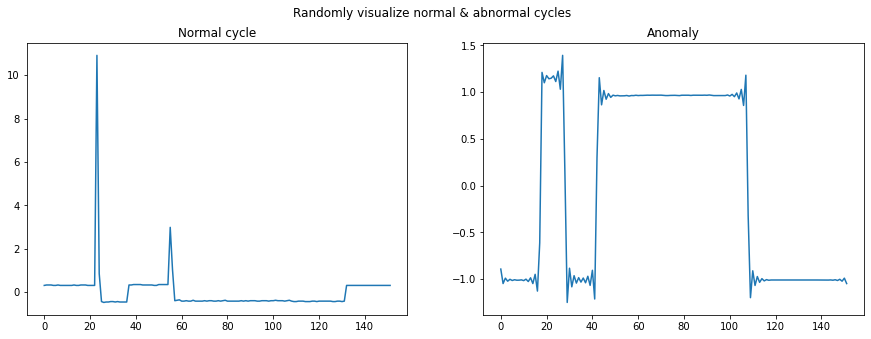

In [7]:
plot_cycle(train)

#### 4. Data processing 

- Data proccessor parameters

In [8]:
col_names = ['value']
id = 'id'

- Create data processor

In [9]:
dp = DataProcessor(x_train, x_test, col_names, id)

- Scaling data

In [10]:
dp.scale_data()

- Reshaping data

In [11]:
dp.reshape_data()
print(dp.s_train.shape)

(1000, 152, 1)


- Windowing: *Size = 10, gap = 4*

In [12]:
dp.windowing(10, 4)

In [25]:
print('Train shape after windowing: ', dp.w_train.shape)

Train shape after windowing:  (36000, 10, 1)


- Visualize windowing overlapping impact

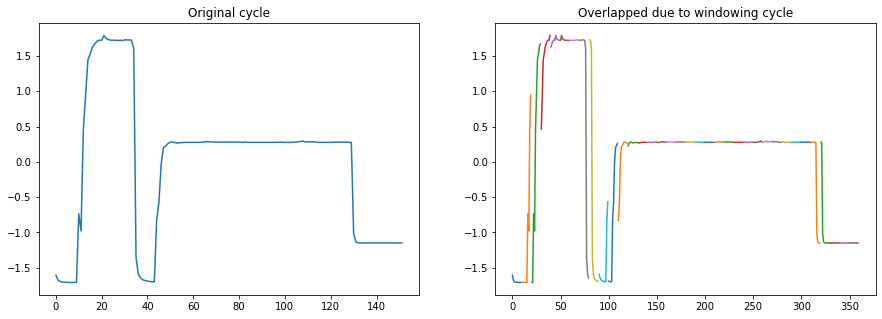

In [28]:
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Plot the first subplot (normal cycle)
for i in range(36):
    axs[1].plot(range(i*10, (i+1)*10), dp.w_train[:36][i, :, 0])
axs[1].set_title('Overlapped due to windowing cycle')
# Plot the second subplot (cycle with anomaly)
axs[0].plot(dp.s_train[0, :, 0])
axs[0].set_title('Original cycle')
plt.show()